INPORT THE LIBRARIES

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
%matplotlib inline

LOAD THE DATASET

In [16]:
mnist=fetch_openml("mnist_784")
print(mnist)

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60

In [17]:
X=mnist['data']
y=mnist['target']
print(X.dtype,y.dtype)
print(X.shape,y.shape)

float64 object
(70000, 784) (70000,)


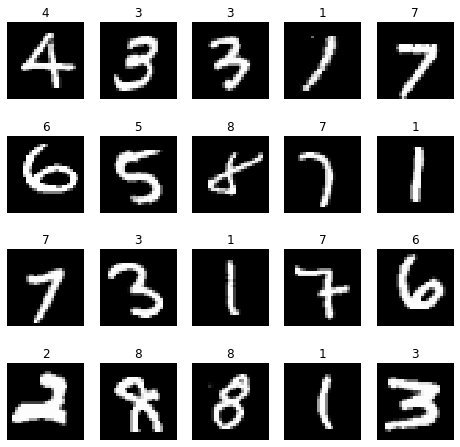

In [18]:
def plot_images(images,labels):
    n_cols=min(5,len(images))
    n_rows=len(images)//n_cols
    fig=plt.figure(figsize=(8,8))
    for i in range(n_rows*n_cols):
        sp=fig.add_subplot(n_rows,n_cols,i+1)
        plt.axis('off')
        plt.imshow(images[i],cmap=plt.cm.gray)
        sp.set_title(labels[i])
    plt.show()    
p=np.random.permutation(len(X))
p=p[:20]
plot_images(X[p].reshape(-1,28,28),y[p])

In [19]:
y=y.astype('int32')
X=X/255.0
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [20]:
x_train,x_test=X[:60000],X[60000:]
y_train,y_test=y[:60000],y[60000:]
import numpy as np
shuffle_index=np.random.permutation(60000)
x_train,y_train=x_train[shuffle_index],y_train[shuffle_index]

TRAIN THE MODEL

In [21]:
from sklearn.naive_bayes import MultinomialNB
cls=MultinomialNB()
cls.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
cls.score(x_test,y_test)

0.8357

In [23]:
from sklearn.metrics import classification_report
pred=cls.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.91      0.93      0.92      1135
           2       0.90      0.83      0.86      1032
           3       0.80      0.84      0.82      1010
           4       0.84      0.74      0.79       982
           5       0.87      0.66      0.75       892
           6       0.89      0.90      0.89       958
           7       0.93      0.84      0.88      1028
           8       0.66      0.80      0.72       974
           9       0.71      0.85      0.77      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.84      0.84     10000



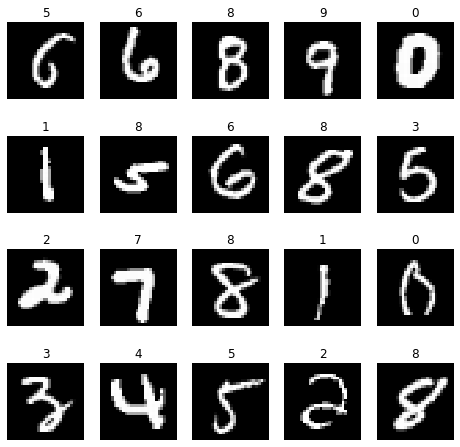

In [25]:
p=np.random.permutation(len(x_test))
p=p[:20]
plot_images(x_test[p].reshape(-1,28,28),pred[p])

This is by Naivebayes(Non-linear kernel)